![image](images/microsoft_logo.jpeg)

# Microsoft Movie Studio
#### Business Recommendations 

**Authors:** Valeria Viscarra Fossati, Olgert Hasko, Sally Heinzel, Czarina Luna 

##### December 2021

***


## Overview

Microsoft is creating a new movie studio. As it prepares to create original video content, it seeks to understand the film industry. We, the advisory team, explored movie production data to help Microsoft successfully launch its first film. We started by conducting a web scrape to extract two datasets containing all the relevant film information. We then merged our datasets and cleaned our data by turning certain strings into floats, adjusting dates to show more details, removing Null values, and adding a column for the rate of return based on the production budget and box office returns. Once the data was clean, we created plots to determine which genres had the highest rate of return, which release dates yielded the highest revenue by genre, and which runtimes were optimal for each genre. Based on the data, we determined that horror films yielded the highest rate of return. The best month to release a horror film is October, and the most optimal film length is 90-105 minutes.

## Business Problem

The advisory team will examine the movies that did well at the box office, and the ones that did not. To guide our analysis, we asked the following questions:
1. Is there a correlation between production budget and box office return?
2. What are the highest grossing genres?
3. Which genre returns the highest investment?
4. What is the best time to release a movie?
5. How long should the film be?


Scraping data from The Numbers, a premiere movie industry data and research service, we describe patterns in profitable movies to aid Microsoft in launching a movie studio that will be successful starting on its opening night.

## Data Understanding

The available datasets included data from The Numbers and IMDb, online databases containing movie industry information. The Numbers data included variables necessary for our analysis, such as production budget and gross profits, while the IMDb data included other important variables, like genres. However, merging these datasets resulted in a significant loss of movies to analyze resulting from numerous unmatched values. Due to this loss, the advisory team acquired additional data by scraping The Numbers website. The complete chart (https://www.the-numbers.com/movie/budgets/all) consisted of all films in their database that includes financial information.

The dataset contains a total of 6,100 films ranging over almost a hundred years, including films release this year, which is larger and more recent than the data set we initially had. It also contains the variables from the other data sets that we initially targeted. Therefore, the advisory team decided to use this data set for our analysis.

We merged our two datasets together, creating a data set with the following variables: 
- the budget and gross figures to be used in finding profits and losses; 
- the genres to be compared with one another; 
- the release date to be sliced into day, month, and quarter of the years; 
- and the runtime in minutes to compare longer and shorter films. 

Given the domestic gross and worldwide gross, we will use the worldwide box office returns to analyze the correlation between production budget and overall profits.

***

We imported the Python libraries required for the data analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Read the datasets

df1 = pd.read_csv("data/tngross.csv")
df2 = pd.read_csv("data/tnproduction.csv")

In [3]:
# Look at the top five and bottom five rows of each data set for a better understanding

df1.head()

,Unnamed: 0,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,0,"Apr 23, 2019",Avengers: Endgame,"$400,000,000","$858,373,000","$2,797,800,564"
1,1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$379,000,000","$241,071,802","$1,045,713,802"
2,2,"Apr 22, 2015",Avengers: Age of Ultron,"$365,000,000","$459,005,868","$1,395,316,979"
3,3,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,064,615,817"
4,4,"Apr 25, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,044,540,523"


In [4]:
df1.tail()

,Unnamed: 0,release_date,movie,production_budget,domestic_gross,worldwide_gross
6095,6095,"Mar 17, 2015",Closure,"$100,000",$0,$0
6096,6096,"Aug 29, 2015",Lunch Time Heroes,"$100,000",$0,$0
6097,6097,"Mar 25, 2015",Open Secret,"$100,000",$0,$0
6098,6098,"Nov 10, 2015",The Night Visitor,"$100,000",$0,$0
6099,6099,"Jul 7, 2015",Tiger Orange,"$100,000",$0,$0


In [5]:
df2.head()

,Unnamed: 0,runtime_minutes,genres,production_company,production_country
0,0,181 minutes,Action,Marvel Studios,United States
1,1,136 minutes,Adventure,Walt Disney Pictures,United States
2,2,141 minutes,Action,Marvel Studios,United States
3,3,136 minutes,Adventure,"Lucasfilm, Bad Robot",United States
4,4,156 minutes,Action,Marvel Studios,United States


In [6]:
df2.tail()

,Unnamed: 0,runtime_minutes,genres,production_company,production_country
6095,6095,90 minutes,Drama,None,United States
6096,6096,88 minutes,Adventure,Phebean Films,Nigeria
6097,6097,None,Documentary,None,United States
6098,6098,None,Horror,None,United States
6099,6099,81 minutes,Drama,None,United States


## Data Preparation

### Merging Datasets
First, we merge the datasets on column "Unnamed: 0" to match the movies from the first dataset to the additional information on the second dataset. Then we dropped the same column and used the merged data frame’s index.

In [7]:
# Merge the two datasets

df = df1.merge(df2, on="Unnamed: 0")

In [8]:
# Drop the unnamed column as we already have an index

df = df.drop("Unnamed: 0", axis=1)

In [9]:
# Check the columns, data types, and check for missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6100 entries, 0 to 6099
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   release_date        6100 non-null   object
 1   movie               6100 non-null   object
 2   production_budget   6100 non-null   object
 3   domestic_gross      6100 non-null   object
 4   worldwide_gross     6100 non-null   object
 5   runtime_minutes     6100 non-null   object
 6   genres              6100 non-null   object
 7   production_company  6100 non-null   object
 8   production_country  6100 non-null   object
dtypes: object(9)
memory usage: 476.6+ KB


### Check for Duplicates

After combining the data sets, we wanted to verify if the duplicate movie names were movies that were movie remakes or if the data was repeating.  The duplicate movie names were not duplicate values but movie remakes. 


In [10]:
# Filter data to show if there are duplicate values by their movie names

duplicate_df = df[df['movie'].duplicated(keep=False)]
duplicate_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,production_company,production_country
13,"Jul 11, 2019",The Lion King,"$260,000,000","$543,638,043","$1,654,367,425",118 minutes,Adventure,"Walt Disney Pictures, Fairview Entertainment",United States
27,"Apr 25, 2012",The Avengers,"$225,000,000","$623,357,910","$1,515,100,211",143 minutes,Action,"Marvel Studios, Paramount Pictures",United States
40,"May 14, 2010",Robin Hood,"$210,000,000","$105,487,148","$322,459,006",139 minutes,Action,"United Artists, Fairbanks","United Kingdom, United States"
41,"Dec 14, 2005",King Kong,"$207,000,000","$218,080,025","$550,517,357",189 minutes,Adventure,Wingnut Films,"New Zealand, United States"
54,"Mar 4, 2010",Alice in Wonderland,"$200,000,000","$334,191,110","$1,025,491,110",108 minutes,Adventure,"Walt Disney Pictures, Roth Films, Zancuk Company",United States
...,...,...,...,...,...,...,...,...,...
6056,"Mar 1, 2002",The Calling,"$160,000","$32,092","$32,092",None,Drama,None,None
6066,"Oct 18, 1974",The Texas Chainsaw Massacre,"$140,000","$26,572,439","$26,572,439",83 minutes,Horror,None,United States
6069,"Nov 16, 1942",Cat People,"$134,000","$4,000,000","$8,000,000",73 minutes,Drama,None,United States
6077,"Oct 1, 1968",Night of the Living Dead,"$114,000","$12,087,064","$30,087,064",96 minutes,Horror,None,United States


In [11]:
# Check if there are duplicated names of movies with the same dates of release

duplicate_df[duplicate_df.duplicated(subset=['movie','release_date'], keep=False)]

,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,production_company,production_country


### Converting Data Types
The next step was to convert the release date from a  string to a date-time format.  We then updated the columns that had dollar signs to remove “$” and “,” before changing the string values to integers.

In [12]:
# Convert the release date values to a date-time format

df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce', format='%b %d, %Y')

In [13]:
# Create a function to change the format of the dollar amount values

def dollar_to_int(column):
    return column.str.replace('$', '').str.replace(',', '').map(int)

df[['production_budget', 'domestic_gross', 'worldwide_gross']] = df[['production_budget', 'domestic_gross', 'worldwide_gross']].apply(dollar_to_int)

In [14]:
df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,production_company,production_country
0,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564,181 minutes,Action,Marvel Studios,United States
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,136 minutes,Adventure,Walt Disney Pictures,United States
2,2015-04-22,Avengers: Age of Ultron,365000000,459005868,1395316979,141 minutes,Action,Marvel Studios,United States
3,2015-12-16,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2064615817,136 minutes,Adventure,"Lucasfilm, Bad Robot",United States
4,2018-04-25,Avengers: Infinity War,300000000,678815482,2044540523,156 minutes,Action,Marvel Studios,United States


### Data Cleaning
Once the values in the worldwide gross were converted to integers, we removed the 0 values because the 0 values in the column were due to no data being available. Without a value in this column, we could not calculate a movie’s profits and therefore we removed those rows. There were 353 rows eliminated through this step.

In [15]:
# Show zero values of worldwide gross

df[(df['worldwide_gross']==0)]

,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,production_company,production_country
218,2022-02-03,Moonfall,150000000,0,0,None,Action,"Centropolis Entertainment, Street Entertainmen...",United States
243,2022-05-27,Top Gun: Maverick,140000000,0,0,None,Action,"Jerry Bruckheimer Films, Skydance Productions,...",United States
441,2020-06-12,Artemis Fowl,100000000,0,0,115 minutes,Adventure,"Walt Disney Pictures, Tribeca Film",United States
520,2017-12-13,Bright,90000000,0,0,117 minutes,Thriller/Suspense,None,United States
521,2021-05-14,Army of the Dead,90000000,0,0,148 minutes,Action,"Stone Quarry, Netflix",United States
...,...,...,...,...,...,...,...,...,...
6095,2015-03-17,Closure,100000,0,0,90 minutes,Drama,None,United States
6096,2015-08-29,Lunch Time Heroes,100000,0,0,88 minutes,Adventure,Phebean Films,Nigeria
6097,2015-03-25,Open Secret,100000,0,0,None,Documentary,None,United States
6098,2015-11-10,The Night Visitor,100000,0,0,None,Horror,None,United States


In [16]:
# Update the dataframe to remove the zero values shown above

df = df[~(df['worldwide_gross']==0)]

### Adding Columns
Once the data was cleaned, we added new columns: one to show each movie’s profits as a dollar value and another to show its return on investment. We also created a new column called category to divide the movies by profitability.

In [17]:
# Create columns to show profit and return on investment we called profit ratio

df['profits'] = df["worldwide_gross"] - df["production_budget"]
df['profits_ratio'] = df["worldwide_gross"] / df["production_budget"]
df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,production_company,production_country,profits,profits_ratio
0,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564,181 minutes,Action,Marvel Studios,United States,2397800564,6.994501
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,136 minutes,Adventure,Walt Disney Pictures,United States,666713802,2.759139
2,2015-04-22,Avengers: Age of Ultron,365000000,459005868,1395316979,141 minutes,Action,Marvel Studios,United States,1030316979,3.822786
3,2015-12-16,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2064615817,136 minutes,Adventure,"Lucasfilm, Bad Robot",United States,1758615817,6.747111
4,2018-04-25,Avengers: Infinity War,300000000,678815482,2044540523,156 minutes,Action,Marvel Studios,United States,1744540523,6.815135


In [18]:
# Create column that categorizes movies whether they earned a profit or not

df['category'] = 'Profitable'
df.loc[df['profits_ratio'] < 1, 'category'] = 'Non-Profitable'

### Creating New Data Frames to Prepare for Analysis 
Once the data was cleaned and the new columns were created, we extracted the columns for each analysis.

The first step of the analysis was to create a new dataset that compared the production budget to profits.  We extracted the fields that related to cash flows for our analysis.

In [19]:
# Created a new dataset with columns for cash flows

movie_cash_flow = df[["movie", "production_budget", "worldwide_gross", "domestic_gross", "profits", "profits_ratio"]]
movie_cash_flow.head(2)

,movie,production_budget,worldwide_gross,domestic_gross,profits,profits_ratio
0,Avengers: Endgame,400000000,2797800564,858373000,2397800564,6.994501
1,Pirates of the Caribbean: On Stranger Tides,379000000,1045713802,241071802,666713802,2.759139


***
The second step was to create a dataset for analysis of profits by genre.  We removed the ‘None’ values from the dataset, and also the genres with extremely low value counts.

In [20]:
# Look at the unique values of genres and corresponding counts

df['genres'].value_counts()

Drama                  1556
Comedy                  960
Action                  736
Adventure               688
Thriller/Suspense       573
Horror                  455
Romantic Comedy         251
None                    128
Documentary             111
Black Comedy            102
Musical                 101
Western                  71
Concert/Performance      13
Multiple Genres           2
Name: genres, dtype: int64

In [21]:
# Removed genres with insignificant movie counts

df = df.loc[(df['genres'] != 'Concert/Performance') & (df['genres'] != 'Multiple Genres')]

genres_df = df[df.genres != 'None']
genres_df.head(2)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,production_company,production_country,profits,profits_ratio,category
0,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564,181 minutes,Action,Marvel Studios,United States,2397800564,6.994501,Profitable
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,136 minutes,Adventure,Walt Disney Pictures,United States,666713802,2.759139,Profitable


***
The third dataset needed for our analysis focused on the dates when movies were released compared to profits.  We dropped rows with missing dates from the data set.

In [22]:
# Removed missing values

dates_df = df[~df['release_date'].isna()]
dates_df.head(2)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,production_company,production_country,profits,profits_ratio,category
0,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564,181 minutes,Action,Marvel Studios,United States,2397800564,6.994501,Profitable
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,136 minutes,Adventure,Walt Disney Pictures,United States,666713802,2.759139,Profitable


***
The fourth dataset was used to compare the runtime of the movies to see if there was a correlation between runtime and profits. Rows where the runtime was “None” were dropped.

In [23]:
# Removed missing values

runtime_df = df[(df['runtime_minutes'] != 'None')]
runtime_df.head(2)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,production_company,production_country,profits,profits_ratio,category
0,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564,181 minutes,Action,Marvel Studios,United States,2397800564,6.994501,Profitable
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,136 minutes,Adventure,Walt Disney Pictures,United States,666713802,2.759139,Profitable


## Data Analysis

To analyze our data, we set out to determine if there was a correlation between production budget and profits. We want Microsoft’s movie studio to make money, and examining the link between the cost of making a film and the profit it returns appeared to be a reasonable starting point.  

### Is there a correlation between production budget and box office return?

Initially, we wanted to find out if there was a strong correlation between production budget and profits.

In [24]:
# Correlation between production budget and profits

movie_cash_flow['production_budget'].corr(movie_cash_flow['profits'])

0.602849302864861

In [25]:
# Separate the movies that earned a profit versus those that did not

movie_cash_flow_earners = movie_cash_flow[movie_cash_flow["profits"] > 0]
movie_cash_flow_losers = movie_cash_flow[movie_cash_flow["profits"] < 0]

In [26]:
# Check correlation between movies that earned a profit versus those that did not

losers = movie_cash_flow_losers['production_budget'].corr(movie_cash_flow_losers['profits'])
winners = movie_cash_flow_earners['production_budget'].corr(movie_cash_flow_earners['profits'])
print(f'The correlation between budget and losses is {losers}.')
print(f'The correlation between budget and profits is {winners}.')

The correlation between budget and losses is -0.6778293629215483.
The correlation between budget and profits is 0.6446713860187766.


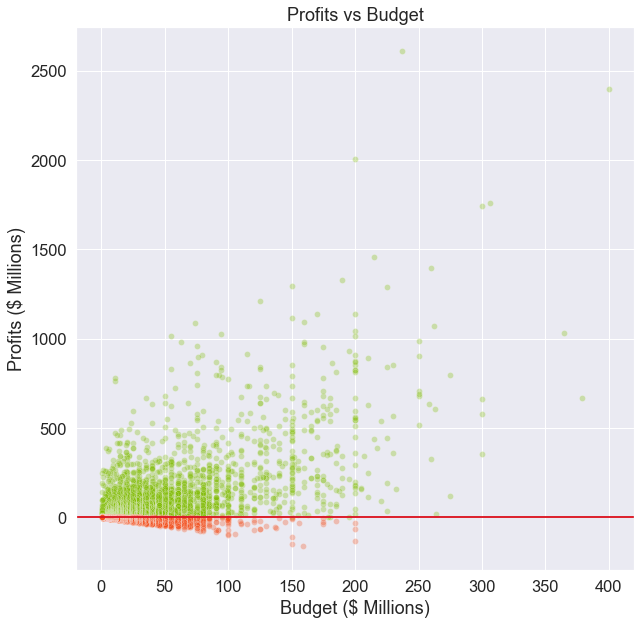

In [27]:
#Creating a graph to represent the data
sns.set_style("whitegrid")
sns.set(font_scale = 1.5)

fig, ax = plt.subplots()

graph1 = sns.scatterplot(
    x=movie_cash_flow_earners['production_budget']/1000000,
    y= movie_cash_flow_earners["profits"]/1000000,
    color='#7FBC00', alpha= .3)

graph2 = sns.scatterplot(
    x=movie_cash_flow_losers['production_budget']/1000000,
    y= movie_cash_flow_losers["profits"]/1000000,
    color='#F34F1C', alpha= .3)

plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

graph1.axhline(1)

plt.xlabel('Budget ($ Millions)')
plt.ylabel('Profits ($ Millions)')
plt.title('Profits vs Budget')
ax.axhline(y=1, color= "red")

fig.set_size_inches(10,10)

# plt.savefig('profits_vs_budget.png') # save graph to file
plt.show()

The horizontal line divides the data points between movies that earned profits and those that did not.

We determined there is a correlation, though not a strong one. Therefore, we decided to analyze movies by genres to see if that yielded more significant findings. We grouped our data by genre and explored production costs, gross earnings, profits earned, and profits ratio.

### What are the highest grossing genres?

In [28]:
# Created a new dataframe that only included movies that earned a profit

gains_genres_df = genres_df.loc[genres_df['profits_ratio'] >= 1]
gains_genres_df.head(2)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,production_company,production_country,profits,profits_ratio,category
0,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564,181 minutes,Action,Marvel Studios,United States,2397800564,6.994501,Profitable
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,136 minutes,Adventure,Walt Disney Pictures,United States,666713802,2.759139,Profitable


In [29]:
# Created a new dataframe that grouped the movies by genre and showed production, gross, and profits

median_df = genres_df.groupby("genres", as_index=False).median().sort_values('profits', ascending=False)
median_df.loc[:,["genres","production_budget","worldwide_gross","profits","profits_ratio"]]

,genres,production_budget,worldwide_gross,profits,profits_ratio
1,Adventure,60000000.0,134481126.5,68120422.0,2.470881
0,Action,45000000.0,90736034.0,43559908.0,2.092760
6,Horror,10000000.0,37048526.0,23512850.0,2.970818
8,Romantic Comedy,20000000.0,39686769.0,20078756.0,2.211184
7,Musical,17500000.0,34949482.0,11395040.0,2.151225
9,Thriller/Suspense,22000000.0,34356760.0,8815460.0,1.579101
3,Comedy,17000000.0,28261759.5,8499617.5,1.763421
2,Black Comedy,11900000.0,23979804.5,7776057.5,1.636257
5,Drama,12500000.0,16014689.0,3350488.5,1.387012
10,Western,14400000.0,15700000.0,3327522.0,1.294361


Comparing profits and genre, we saw that adventure and action movies have the highest yields. However, those movies are also the most expensive to make. Since Microsoft may not desire to spend tens or hundreds of millions of dollars on movies, especially early on into their movie studio venture, we examined genres by median profit. Here we discovered that horror had, by far, the highest median profit ratio (3:1) compared to adventure and action movies (2:1).

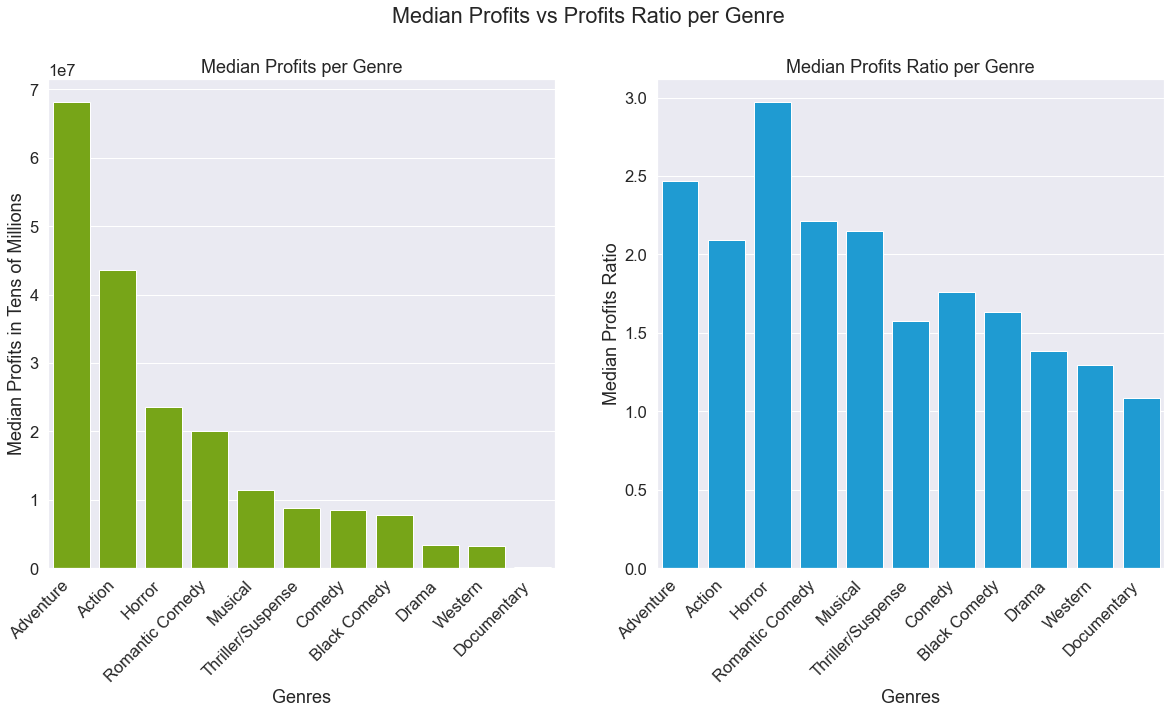

In [30]:
# Create a graph to show profits per genre as well as profits ratio per genre

fig, axes = plt.subplots(ncols=2, figsize=(20, 10))
fig.suptitle('Median Profits vs Profits Ratio per Genre')
fig.autofmt_xdate(rotation=45)

sns.barplot(
    data=median_df, 
    x='genres', 
    y="profits_ratio", 
    color='#01A6F0', 
    ci=None, 
    ax=axes[1])

sns.barplot(
    data=median_df, 
    x="genres", 
    y="profits", 
    color='#7FBC00', 
    ci=None, 
    ax=axes[0])

axes[1].set_title('Median Profits Ratio per Genre')
axes[1].set_xlabel('Genres')
axes[1].set_ylabel('Median Profits Ratio')


axes[0].set_title('Median Profits per Genre')
axes[0].set_xlabel('Genres')
axes[0].set_ylabel('Median Profits in Tens of Millions')

# plt.savefig('profits_per_genre.png') # save graph to file
plt.show()

At first we looked at median profits per genre. On the left graph, adventure and action movies yield the highest median grossing returns. From our budget analysis, we also know that those are the most costly movies to produce.

We decided to look at the median profits ratio that was calculated using median profits and production costs. The results from this comparison showed that horror films yield the highest rate of return, resulting in a return of 3:1 profits versus production costs, compared to the 2:1 profit versus production cost ratio resulting from action and adventure movies.

### What is the best time to release a movie?

We looked at release dates to see if there was a certain time of year that was best to release movies. 

In [31]:
# Create new columns that show the day and month of release dates

dates_df['day'] = dates_df['release_date'].dt.dayofweek
dates_df['month'] = pd.DatetimeIndex(dates_df['release_date']).month
dates_df['year'] = pd.DatetimeIndex(dates_df['release_date']).year

<ipython-input-31-1405c7e387e0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dates_df['day'] = dates_df['release_date'].dt.dayofweek
<ipython-input-31-1405c7e387e0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dates_df['month'] = pd.DatetimeIndex(dates_df['release_date']).month
<ipython-input-31-1405c7e387e0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [32]:
# Grouping the movie counts by day

day_df = dates_df.groupby("day", as_index=False).count()

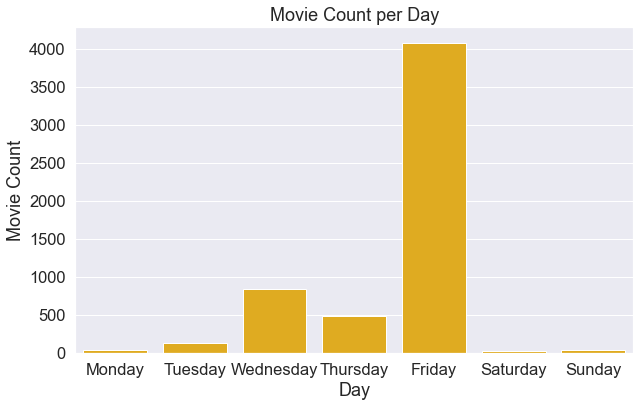

In [33]:
# Create a plot of movie counts per day

fig, ax = plt.subplots(figsize=(10,6))

ax = sns.barplot(
    data=day_df, 
    x="day", 
    y="movie", 
    color='#FFBA01', 
    ci=None)

ax.set_title('Movie Count per Day')
ax.set_xlabel('Day')
ax.set_ylabel('Movie Count')

plt.xticks(range(7), ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.show()

Overall, Friday is the most popular release day, with over 4000 movies released on this day. 

Moving on to the months, we dive in to horror movies, the top genre that yielded the highest rate of returns.

In [34]:
# Create new dataframes to isolate profitable movies and in particular, profitable horror movies

gains_dates_df = dates_df.loc[dates_df['profits_ratio'] >= 1]
horror_dates_df = gains_dates_df.loc[gains_dates_df['genres'] == 'Horror']

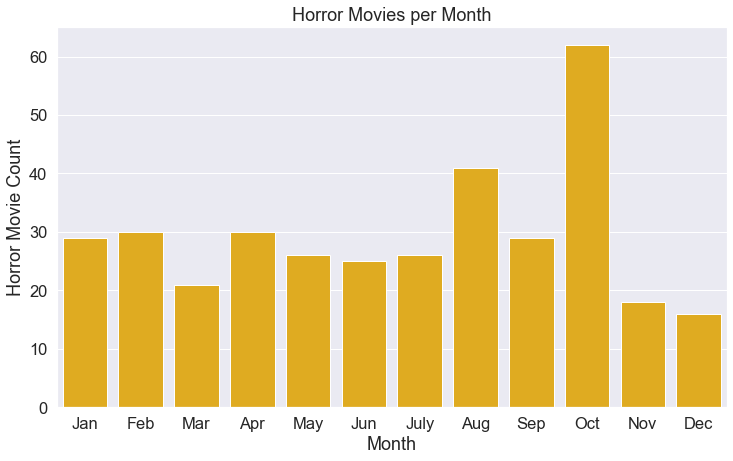

In [35]:
# Create a countplot of the profitable horror movies per month

fig, ax = plt.subplots(figsize=(12, 7))

sns.countplot(
    x="month", 
    color="#FFBA01",
    data = horror_dates_df,)
plt.title("Horror Movies per Month")
plt.xlabel("Month")
plt.ylabel("Horror Movie Count")

plt.xticks(range(12), ['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec'])

# plt.savefig('horror_per_month.png') # save graph to file
plt.show()

Among the profitable horror movies, the most popular month of release date was October. This is in contrast with the non-profitable horror movies' release month topped by September, one month earlier.

In [36]:
# Create a new dataframe to isolate non-profitable horror movies

loss_dates_df = dates_df.loc[dates_df['profits_ratio'] < 1]
horror_loss_df = loss_dates_df[loss_dates_df['genres'] == 'Horror']

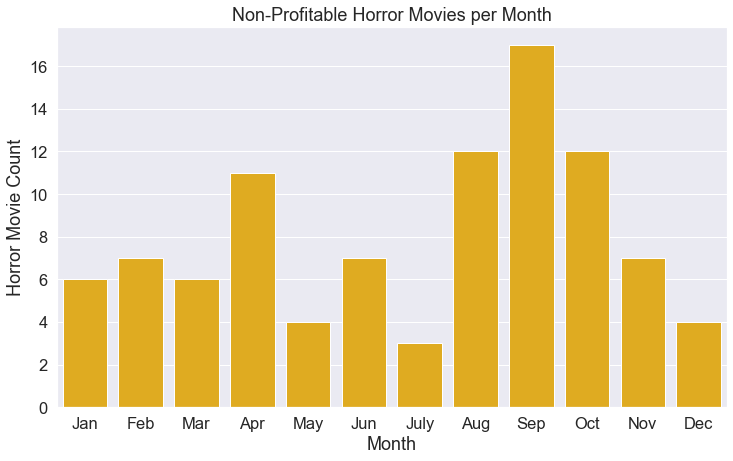

In [37]:
# Create a countplot of non-profitable horror movies per month

fig, ax = plt.subplots(figsize=(12,7))

sns.countplot(
    x="month", 
    color="#FFBA01",
    data = horror_loss_df,)
plt.title("Non-Profitable Horror Movies per Month")
plt.xlabel("Month")
plt.ylabel("Horror Movie Count")

plt.xticks(range(12), ['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec'])

plt.show()

To further explore the horror genre, we analyze its popularity over time as shown by the number of movies produced per year.

In [38]:
# Create a new dataframe of only horror movies and group by the year released

horror_df = dates_df[dates_df['genres']=='Horror']
horror_group_df = horror_df.groupby('year', as_index=False).count()

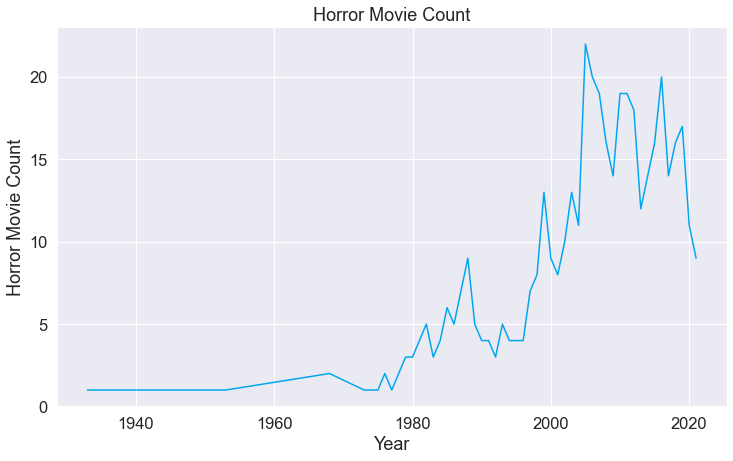

In [39]:
# Create a plot of horror movie counts over the years

fig, ax = plt.subplots(figsize=(12,7))

sns.lineplot(
    x="year",
    y="movie",
    color="#01A6F0",
    data = horror_group_df,)
plt.title("Horror Movie Count")
plt.xlabel("Year")
plt.ylabel("Horror Movie Count")

# plt.savefig('horror_count_years.png') # save graph to file
plt.show()

The graph above shows the trend of increasing horror movies produced since 1980.

We also compare profitable and non-profitable movies in the following graph, to check for variability in the horror movies' profitability throughout the years.

In [40]:
# Create a new dataframe of only horror movies and group by the year release as well as profitability

horror_count = horror_df.groupby(['year','category'], as_index=False).count()[['year', 'category', 'movie']]
horror_count

,year,category,movie
0,1933,Profitable,1
1,1953,Profitable,1
2,1968,Profitable,2
3,1973,Profitable,1
4,1974,Profitable,1
...,...,...,...
78,2019,Profitable,17
79,2020,Non-Profitable,3
80,2020,Profitable,8
81,2021,Non-Profitable,1


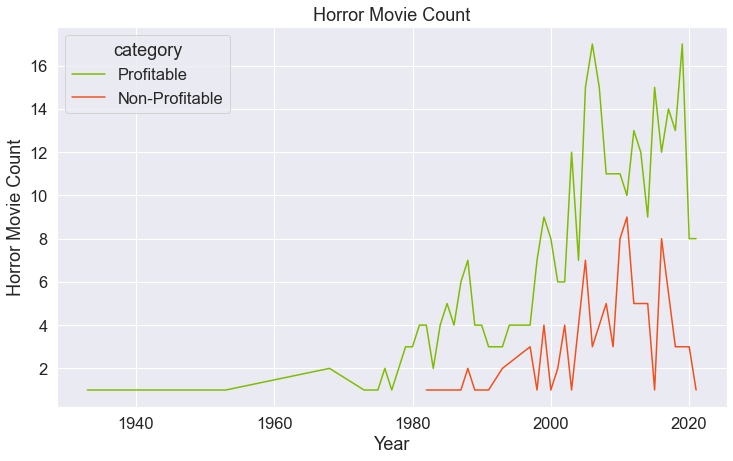

In [41]:
# Create a plot of horror movie counts over the years grouped according to profitability

fig, ax = plt.subplots(figsize=(12,7))

sns.lineplot(
    x="year",
    y="movie",
    hue="category",
    data = horror_count,
    palette=sns.color_palette(['#7FBC00', '#F34F1C']))


plt.title("Horror Movie Count")
plt.xlabel("Year")
plt.ylabel("Horror Movie Count")

# plt.savefig('horror_count_profit.png') # save graph to file
plt.show()

In [42]:
# Find the percentage of profitable horror movies

horror_df['category'].value_counts(normalize=True)*100

Profitable        78.619154
Non-Profitable    21.380846
Name: category, dtype: float64

The count of profitable horror movies are greater than the count of non profitable movies over the years. 79% of all horror movies yielded a positive rate of return.

## How long should the film be?

In [43]:
# Convert the string values of runtime to integers

runtime_df['runtime_minutes'] = runtime_df['runtime_minutes'].str.replace('minutes', '')
runtime_df['runtime_minutes'] = runtime_df['runtime_minutes'].astype(int)

<ipython-input-43-185b38dd3ebf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runtime_df['runtime_minutes'] = runtime_df['runtime_minutes'].str.replace('minutes', '')
<ipython-input-43-185b38dd3ebf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runtime_df['runtime_minutes'] = runtime_df['runtime_minutes'].astype(int)


In [44]:
runtime_df = runtime_df.loc[(runtime_df['genres'] != 'None')]

In [45]:
runtime_df.describe()

,production_budget,domestic_gross,worldwide_gross,runtime_minutes,profits,profits_ratio
count,4.718000e+03,4.718000e+03,4.718000e+03,4718.000000,4.718000e+03,4718.000000
mean,3.791222e+07,5.189427e+07,1.161069e+08,109.245443,7.819465e+07,4.798698
std,4.519174e+07,7.548228e+07,1.985386e+08,19.742007,1.681823e+08,17.410292
min,1.000000e+05,0.000000e+00,1.700000e+01,41.000000,-1.580898e+08,0.000002
25%,9.000000e+06,5.963404e+06,1.258305e+07,95.000000,-7.321238e+05,0.888601
50%,2.200000e+07,2.684756e+07,4.527922e+07,106.000000,2.058394e+07,2.146884
75%,5.000000e+07,6.502514e+07,1.318375e+08,120.000000,8.491387e+07,4.256127
max,4.000000e+08,9.366622e+08,2.845900e+09,260.000000,2.608900e+09,498.750000


Here we can see that the mean runtime for all the movies in our dataset is 109 minutes. Next, we'll check to see if there's a correlation between the runtime of movies and its profitability.

In [46]:
#Calculate correlation of movie runtime and profitability

runtime_df['runtime_minutes'].corr(runtime_df['profits_ratio'])

-0.02928590650761622

There's a negative correlation between movie profitability and runtime (longer movies are less profitable and shorter movies are more profitable), but it's a weak correlation. To dig in a bit further, let's divide the data into 2 dataframes: one with movies that made a profit and one with movies that didn't make a profit. That way we can compare the runtimes between those two groups to get a better sense of their similarity or difference.

In [47]:
#Create two new data frames, one that only includes profitable movies and one that only includes unprofitable movies

profitable = runtime_df[runtime_df['profits_ratio'] >= 1]
non_profitable = runtime_df[runtime_df['profits_ratio'] < 1]

In [48]:
#Calculate correlation of movie runtime and profitability for both the profitable and non-profitable data frames

correlation_profitable = profitable['runtime_minutes'].corr(profitable['profits_ratio'])
correlation_non_profitable = non_profitable['runtime_minutes'].corr(non_profitable['profits_ratio'])

print(f'The correlation of movie runtime and profitability for profitable movies is: {correlation_profitable}.')
print(f'The correlation of movie runtime and profitability for non-profitable movies is: {correlation_non_profitable}.')

The correlation of movie runtime and profitability for profitable movies is: -0.04939102434021609.
The correlation of movie runtime and profitability for non-profitable movies is: 0.12106129303953622.


Profitable movies have a weak negative correlation between runtime and profitablity while non-profitable movies have a slighlty larger positive correlation. Based on this, it's best to stick with shorter, as opposed to longer, running times for a greater chance at a successful movie.

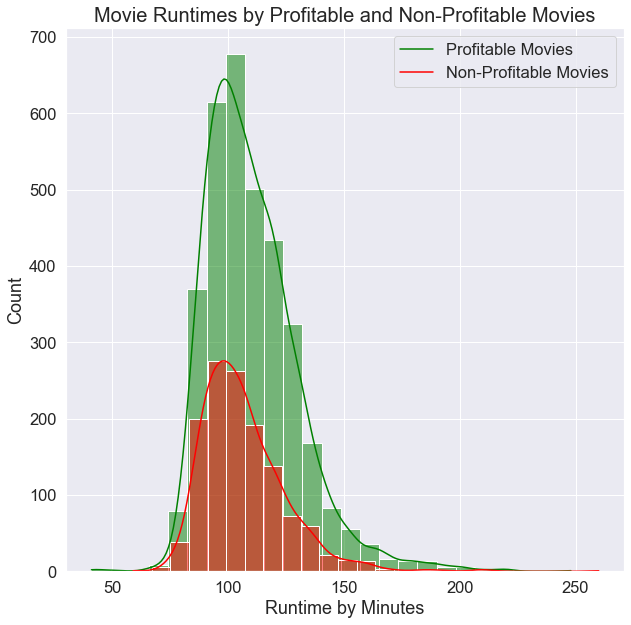

In [49]:
#Create a historgram with kde line of movie runtimes for both profitable movies and unprofitable movies

fig, ax = plt.subplots(figsize = (10,10))

sns.histplot(data=profitable, x="runtime_minutes", color="green", bins=25, kde=True)
plt.xlabel("Runtime by Minutes")
plt.title("Movie Runtimes by Profitable and Non-Profitable Movies", size=20)

sns.histplot(data=non_profitable, x="runtime_minutes", color="red", alpha=0.5, bins=25, kde=True)
plt.legend(labels=["Profitable Movies","Non-Profitable Movies"])

# plt.savefig('movie_runtime.png') # save graph to file
plt.show()

In [50]:
# Create a new dataframe to find the top 5 genres

top_5_genres_by_medianprofit = runtime_df.groupby("genres", as_index=False).median().sort_values('profits_ratio', ascending=False)[0:5]

top_5_genres_by_medianprofit.loc[:, ['genres', 'runtime_minutes']]

,genres,runtime_minutes
6,Horror,96.0
8,Romantic Comedy,104.0
7,Musical,113.0
1,Adventure,99.0
0,Action,112.0


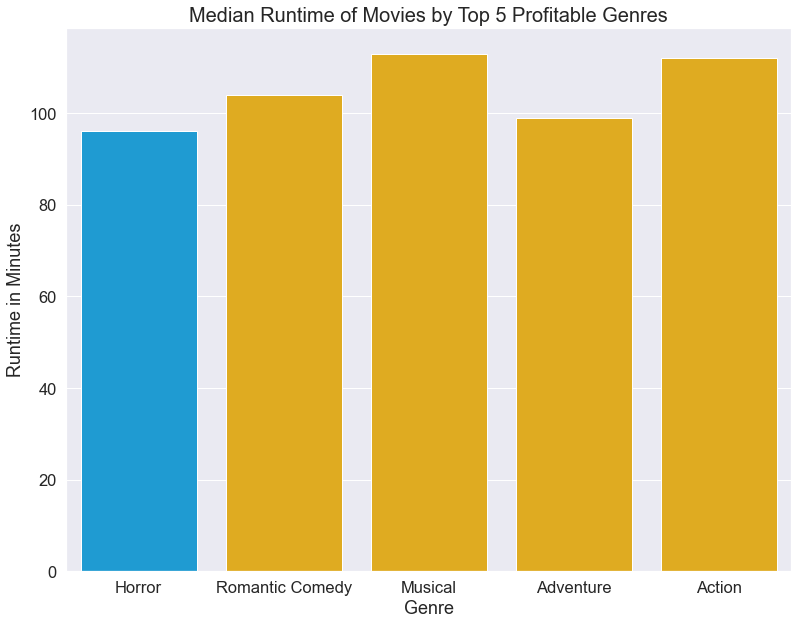

In [51]:
#Create bar graph showing median runtime of movies by genre
fig, ax = plt.subplots(figsize = (13,10))

sns.barplot(x='genres', y='runtime_minutes', data=top_5_genres_by_medianprofit,
           palette=sns.color_palette(['#01A6F0', '#FFBA01', '#FFBA01', '#FFBA01', '#FFBA01']))

plt.xlabel("Genre")
plt.ylabel("Runtime in Minutes")
plt.title("Median Runtime of Movies by Top 5 Profitable Genres", size=20)

# plt.savefig('runtime_per_genre.png') # save graph to file
plt.show()

Since the runtimes of profitable and non-profitable movies don't vary that much, it's better to look at the median runtime of a specific genre. For the most profitable genre, horror, Microsoft should shoot for a runtime of between 90 and 105 minutes

## Evaluation

After discovering that horror films yielded the highest return on investment, we took a look at the horror movies' performance and found that the popularity of horror films have increased over the past 40 forty years, making this an attractive genre on which to focus Microsoft’s resources. This analysis prompted us to explore the horror movies more closely to determine if there were discernible trends within this profitable genre. 

We looked at release dates to see if there was a certain time of year that was best to release horror movies. After separating profitable horror movies from unprofitable horror movies, we saw that October was the most popular month by count for profitable horror films to be released. September was the most popular month by count for unprofitable horror films to be released. 

Going further, we also examined the runtime of profitable and unprofitable movies to see if there was a relationship to profitability. We chose to look at median runtimes in order to reduce the effect of outliers on our analysis. The median runtime of profitable movies is 107 minutes; for unprofitable movies, the median runtime is 103. This 4-minute difference doesn’t really tell us a lot, so we examined runtime by genre. We found that different genres have different median runtimes, with horror having a median runtime of 96 minutes. Calculating the interquartile range gives us a runtime of 90-105 minutes, which is a reasonable window for Microsoft to aim for their movies’ runtimes.

## Conclusions

Based on the findings from our data analysis, we recommend that Microsoft focus on producing films within the horror genre, as horror movies have the highest rate of return of any genre. Moreover, horror movies are increasing in popularity over the past 40 years, as evidenced by the number of releases by year. 

The most profitable month to release horror films is, perhaps unsurprisingly, in October. Of special note, our analysis revealed the most unprofitable month for horror films is September, so we urge Microsoft not to release a horror film until October begins. The median runtime for horror movies is 96 minutes, with the bulk spanning 90-105 minutes. We therefore recommend that Microsoft release horror films in October with a runtime between 90-105 minutes. 

We do caution that this may not be a guarantee for success at Microsoft’s movie studio. For one, since Microsoft is just beginning to make films, it does not yet have an established reputation. This may make people wary of going to see their films initially. Additionally, movie quality is important. If the movies have uninspired plots, poor acting, and sloppy edits, they may not prove to be profitable.
 
For that reason, one future course of inquiry would be to analyze the impact of specific directors and actors on a movie’s profitability. Utilizing well-known and respected movie talent would likely increase people’s confidence in the film’s quality and give it a greater chance of ending up as a quality product. 

Another mode of inquiry would be to determine what the most critically acclaimed films are. Those with the highest reviews or most awards may not be the most profitable, but perhaps Microsoft wants to focus on establishing a reputation for quality films, especially as it builds its movie catalog. Proving its ability to make interesting and creative movies would likely attract popular and skilled film industry talent, thereby further increasing the quality of Microsoft’s movies and resulting in greater profitability.